# Email Spam Classification

This project is a Python implementation of an email spam classification system.
The goal is to build a model that can accurately classify emails as either spam or not spam.

The project uses the scikit-learn library to train and evaluate the model.
The dataset can be obtained from [here](https://github.com/SmallLion/Python-Projects/blob/main/Spam-detection/spam.csv),
which contains a collection of emails with labels indicating whether they are spam or not spam.

## Project Preparation

Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Load the dataset

In [2]:
df = pd.read_csv("dataset/spam.csv")
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Split the data into train and test set

In [3]:
X = df.iloc[:, 1:2]
y = df.iloc[:, 0:1]

Visualize the class distribution

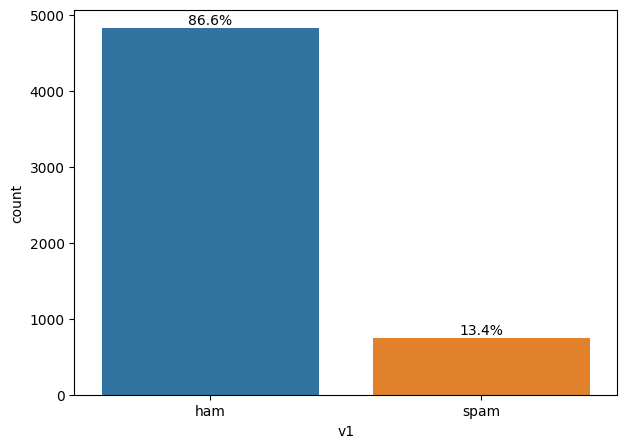

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="v1", data=df)
   
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(X))
    x_countplot = p.get_x() + p.get_width()/2
    y_countplot = p.get_height()+ 50
    ax.annotate(percentage, (x_countplot, y_countplot), ha='center')
plt.show()

We can see that there's huge differences in class distribution, where the majority of data is ham (86.6%) and only 13.4% are spam

Split the training and testing set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values.ravel(), 
    y.values.ravel(), 
    test_size=0.20, 
    random_state=42)

Feature Extraction

In [6]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

## Model Training

Create the pipeline using Count Vectorizer

In [7]:
clf_method = KNeighborsClassifier()

clf_count_vectorizer = Pipeline([
     ('vectorizer', count_vectorizer),
     ('classifier', clf_method)
 ])

clf_count_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [8]:
clf_tfidf_vectorizer = Pipeline([
     ('vectorizer', tfidf_vectorizer),
     ('classifier', clf_method)
 ])

clf_tfidf_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [9]:
y_train_pred_cvect = clf_count_vectorizer.predict(X_train)
y_train_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_train)

print(f"Train Accuracy using Count Vectorizer: {accuracy_score(y_train, y_train_pred_cvect):.3f}")
print(f"Train Accuracy using TF-IDF Vectorizer: {accuracy_score(y_train, y_train_pred_tfidf_vect):.3f}")

Train Accuracy using Count Vectorizer: 0.973
Train Accuracy using TF-IDF Vectorizer: 0.920


In [10]:
print(classification_report(y_train, y_train_pred_cvect))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3860
        spam       0.99      0.81      0.89       597

    accuracy                           0.97      4457
   macro avg       0.98      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



In [11]:
print(classification_report(y_train, y_train_pred_tfidf_vect))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      3860
        spam       1.00      0.41      0.58       597

    accuracy                           0.92      4457
   macro avg       0.96      0.70      0.77      4457
weighted avg       0.93      0.92      0.91      4457



Training results shows that model trained with count vectorizer + KNN perform better than model with tfidf vectorizer

## Model Evaluation

In [12]:
y_test_pred_cvect = clf_count_vectorizer.predict(X_test)
y_test_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_test)

print(f"Test Accuracy using Count Vectorizer: {accuracy_score(y_test, y_test_pred_cvect):.3f}")
print(f"Test Accuracy using TF-IDF Vectorizer: {accuracy_score(y_test, y_test_pred_tfidf_vect):.3f}")

Test Accuracy using Count Vectorizer: 0.968
Test Accuracy using TF-IDF Vectorizer: 0.916


In [13]:
print(classification_report(y_test, y_test_pred_cvect))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.97      0.78      0.87       150

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [14]:
print(classification_report(y_test, y_test_pred_tfidf_vect))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       965
        spam       1.00      0.37      0.54       150

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.75      1115
weighted avg       0.92      0.92      0.90      1115



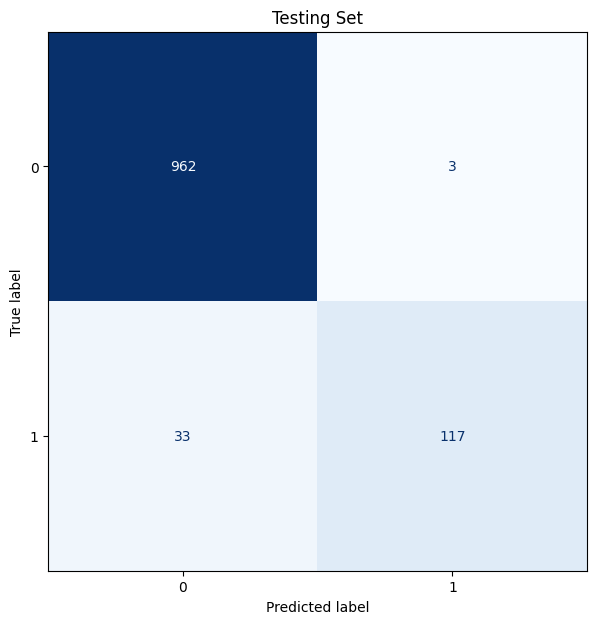

In [15]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_cvect))

fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Testing Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False);

## Conclusion

Based on the results of the machine learning project, it can be concluded that using CountVectorizer with KNN classifier outperforms TF-IDF Vectorizer with KNN in terms of accuracy. The model achieved an accuracy of 0.973 on the training set and 0.968 on the test set, compared to an accuracy of 0.920 on the training set and 0.916 on the test set achieved by the TF-IDF Vectorizer with KNN. Therefore, it can be concluded that the CountVectorizer with KNN model is more reliable and accurate in predicting the outcome of the given dataset.